In [1040]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

# Read file dataset from CSV
data = pd.read_csv("../Survei Pengguna Produk Simpanan Individu.csv")

# Data detail
print(data.info())
print(data.describe(include='all'))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                        --------------  -----  
 0   Timestamp                                                                                                                                                                                           

In [1041]:
data.rename(columns = {
    "Timestamp":"jejak waktu",
    "Kami mohon kesediaan Anda untuk menjawab pertanyaan-pertanyaan pada section berikutnya dengan jujur dan sesuai dengan produk simpanan individu yang Anda miliki. Dengan lanjut ke section berikutnya, Anda menyetujui bahwa seluruh data (terkecuali nama dan nomor telepon undian) akan digunakan sebagai bahan penelitian.":"perizinan",
    "Produk simpanan individu apa yang Anda gunakan?":"produk",
    "Nama / Inisial":"nama",
    "Nomor Telepon - GOPAY/OVO/SHOPEEPAY":"nomor_telepon",
    "Umur":"umur",
    "Domisili":"domisili",
    "Gender":"gender",
    "Status Perkawinan":"status_perkawinan",
    "Jumlah Tanggungan":"jumlah_tanggungan",
    "Kegiatan atau pekerjaan saat ini":"profesi",
    "Apa tujuan pengunaan produk simpanan individu yang Anda pilih?":"tujuan",
    "Berapa jumlah rata-rata penghasilan Anda per bulan?":"penghasilan",
    "Seberapa besar rata-rata persentase penghasilan yang Anda tabung?":"persentasi_tabungan",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki fungsionalitas yang baik?":"rate_fungsionalitas",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki biaya admin yang sesuai dengan fungsi yang Anda dapatkan?":"rate_admin",
    "Menurut Anda, apakah produk simpanan individu yang anda gunakan memiliki limit tabungan yang sesuai dengan kebutuhan Anda?":"rate_limit",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki bunga tabungan yang sesuai dengan keinginan Anda?":"rate_bunga",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki syarat setoran awal yang memberatkan?":"rate_setoran_awal",
    "Apakah produk simpanan individu yang Anda gunakan sudah sesuai dan cocok dengan kebutuhan, kemampuan, dan keinginan Anda?":"rate_kebutuhan",
    "Apakah ada alasan lain di luar bunga, limit, dan biaya admin yang membuat Anda memutuskan untuk menggunakan produk simpanan individu tersebut?":"alasan_lainnya"
    }, 
            inplace = True)

print(data)

             jejak waktu                        perizinan              produk  \
0    12/11/2024 16:35:12  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
1    13/11/2024 07:03:59  Setuju dan saya bersedia lanjut    Tabungan Regular   
2    13/11/2024 07:08:22  Setuju dan saya bersedia lanjut    Tabungan Regular   
3    13/11/2024 07:15:44  Setuju dan saya bersedia lanjut    Tabungan Regular   
4    13/11/2024 07:18:27  Setuju dan saya bersedia lanjut    Tabungan Regular   
..                   ...                              ...                 ...   
445  15/12/2024 18:43:03  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
446  21/12/2024 19:39:57  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
447  24/12/2024 11:36:35  Setuju dan saya bersedia lanjut    Tabungan Pelajar   
448  26/12/2024 17:56:22  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
449  28/12/2024 16:31:51  Setuju dan saya bersedia lanjut    Tabungan Regular   

                 nama      

Handle Missing Value

jejak waktu              0
perizinan                0
produk                   2
nama                    81
nomor_telepon           92
umur                     2
domisili                 2
gender                   2
status_perkawinan        2
jumlah_tanggungan        2
profesi                  2
tujuan                   2
penghasilan              2
persentasi_tabungan      2
rate_fungsionalitas      2
rate_admin               2
rate_limit               2
rate_bunga               2
rate_setoran_awal        2
rate_kebutuhan           2
alasan_lainnya         196
dtype: int64

 ---Visualization---


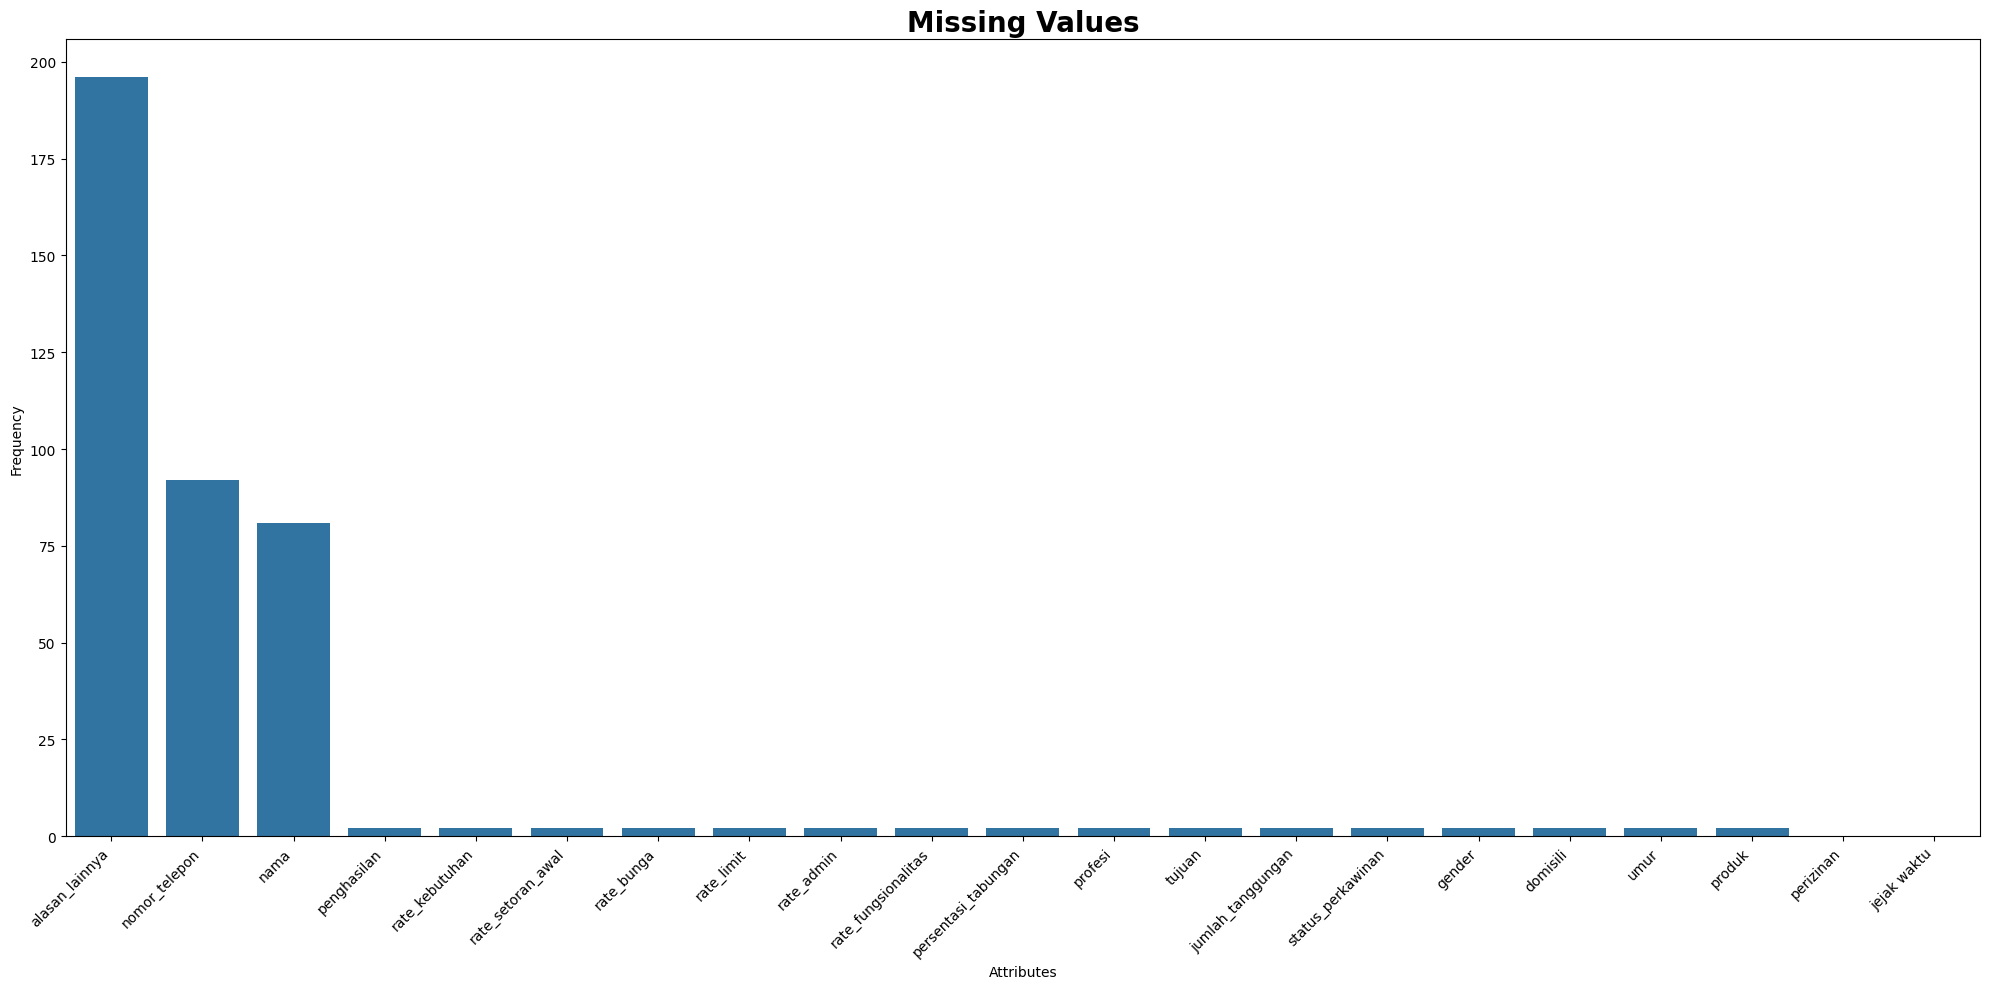

In [1042]:
# Cek missing value kolom
print(data.isnull().sum())

print("\n ---Visualization---")

# DataFrame untuk menghitung missing values
missing_values = pd.DataFrame({
    'Attributes': data.columns,  # Nama kolom
    'Frequency': data.isnull().sum()  # Jumlah missing values di setiap kolom
})

# Urutkan berdasarkan jumlah missing value
missing_values = missing_values.sort_values(by='Frequency', ascending=False)

# Plot visualisasi
plt.figure(figsize=(20, 10))  # Ukuran grafik
plt.title('Missing Values', fontsize=20, fontweight='bold')  # Judul grafik

sns.barplot(
    x='Attributes',
    y='Frequency',
    data=missing_values,
    order=missing_values['Attributes']
)

# Rotasi label untuk kolom agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()

In [1043]:
# Hapus data kosong by label
data.dropna(subset=['produk'], inplace=True)

# Cek missing value
print(data.isnull().sum())

jejak waktu              0
perizinan                0
produk                   0
nama                    79
nomor_telepon           90
umur                     0
domisili                 0
gender                   0
status_perkawinan        0
jumlah_tanggungan        0
profesi                  0
tujuan                   0
penghasilan              0
persentasi_tabungan      0
rate_fungsionalitas      0
rate_admin               0
rate_limit               0
rate_bunga               0
rate_setoran_awal        0
rate_kebutuhan           0
alasan_lainnya         194
dtype: int64


Handling Duplicate Data

In [1044]:
print("Data sebelum dihapus duplikat:\n", data)

# Menghapus duplikat
data = data.drop_duplicates()

print("\nData setelah dihapus duplikat:\n", data)

Data sebelum dihapus duplikat:
              jejak waktu                        perizinan              produk  \
0    12/11/2024 16:35:12  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
1    13/11/2024 07:03:59  Setuju dan saya bersedia lanjut    Tabungan Regular   
2    13/11/2024 07:08:22  Setuju dan saya bersedia lanjut    Tabungan Regular   
3    13/11/2024 07:15:44  Setuju dan saya bersedia lanjut    Tabungan Regular   
4    13/11/2024 07:18:27  Setuju dan saya bersedia lanjut    Tabungan Regular   
..                   ...                              ...                 ...   
445  15/12/2024 18:43:03  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
446  21/12/2024 19:39:57  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
447  24/12/2024 11:36:35  Setuju dan saya bersedia lanjut    Tabungan Pelajar   
448  26/12/2024 17:56:22  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
449  28/12/2024 16:31:51  Setuju dan saya bersedia lanjut    Tabungan Regular

Remove Tabungan Valas & Optimal

In [1045]:
data = data[data["produk"] != "Tabungan Valas"]
data = data[data["produk"] != "Tabungan Optimal"]

Remove Irrelevant Attributes

c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\avenv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\avenv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\avenv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\Users\b

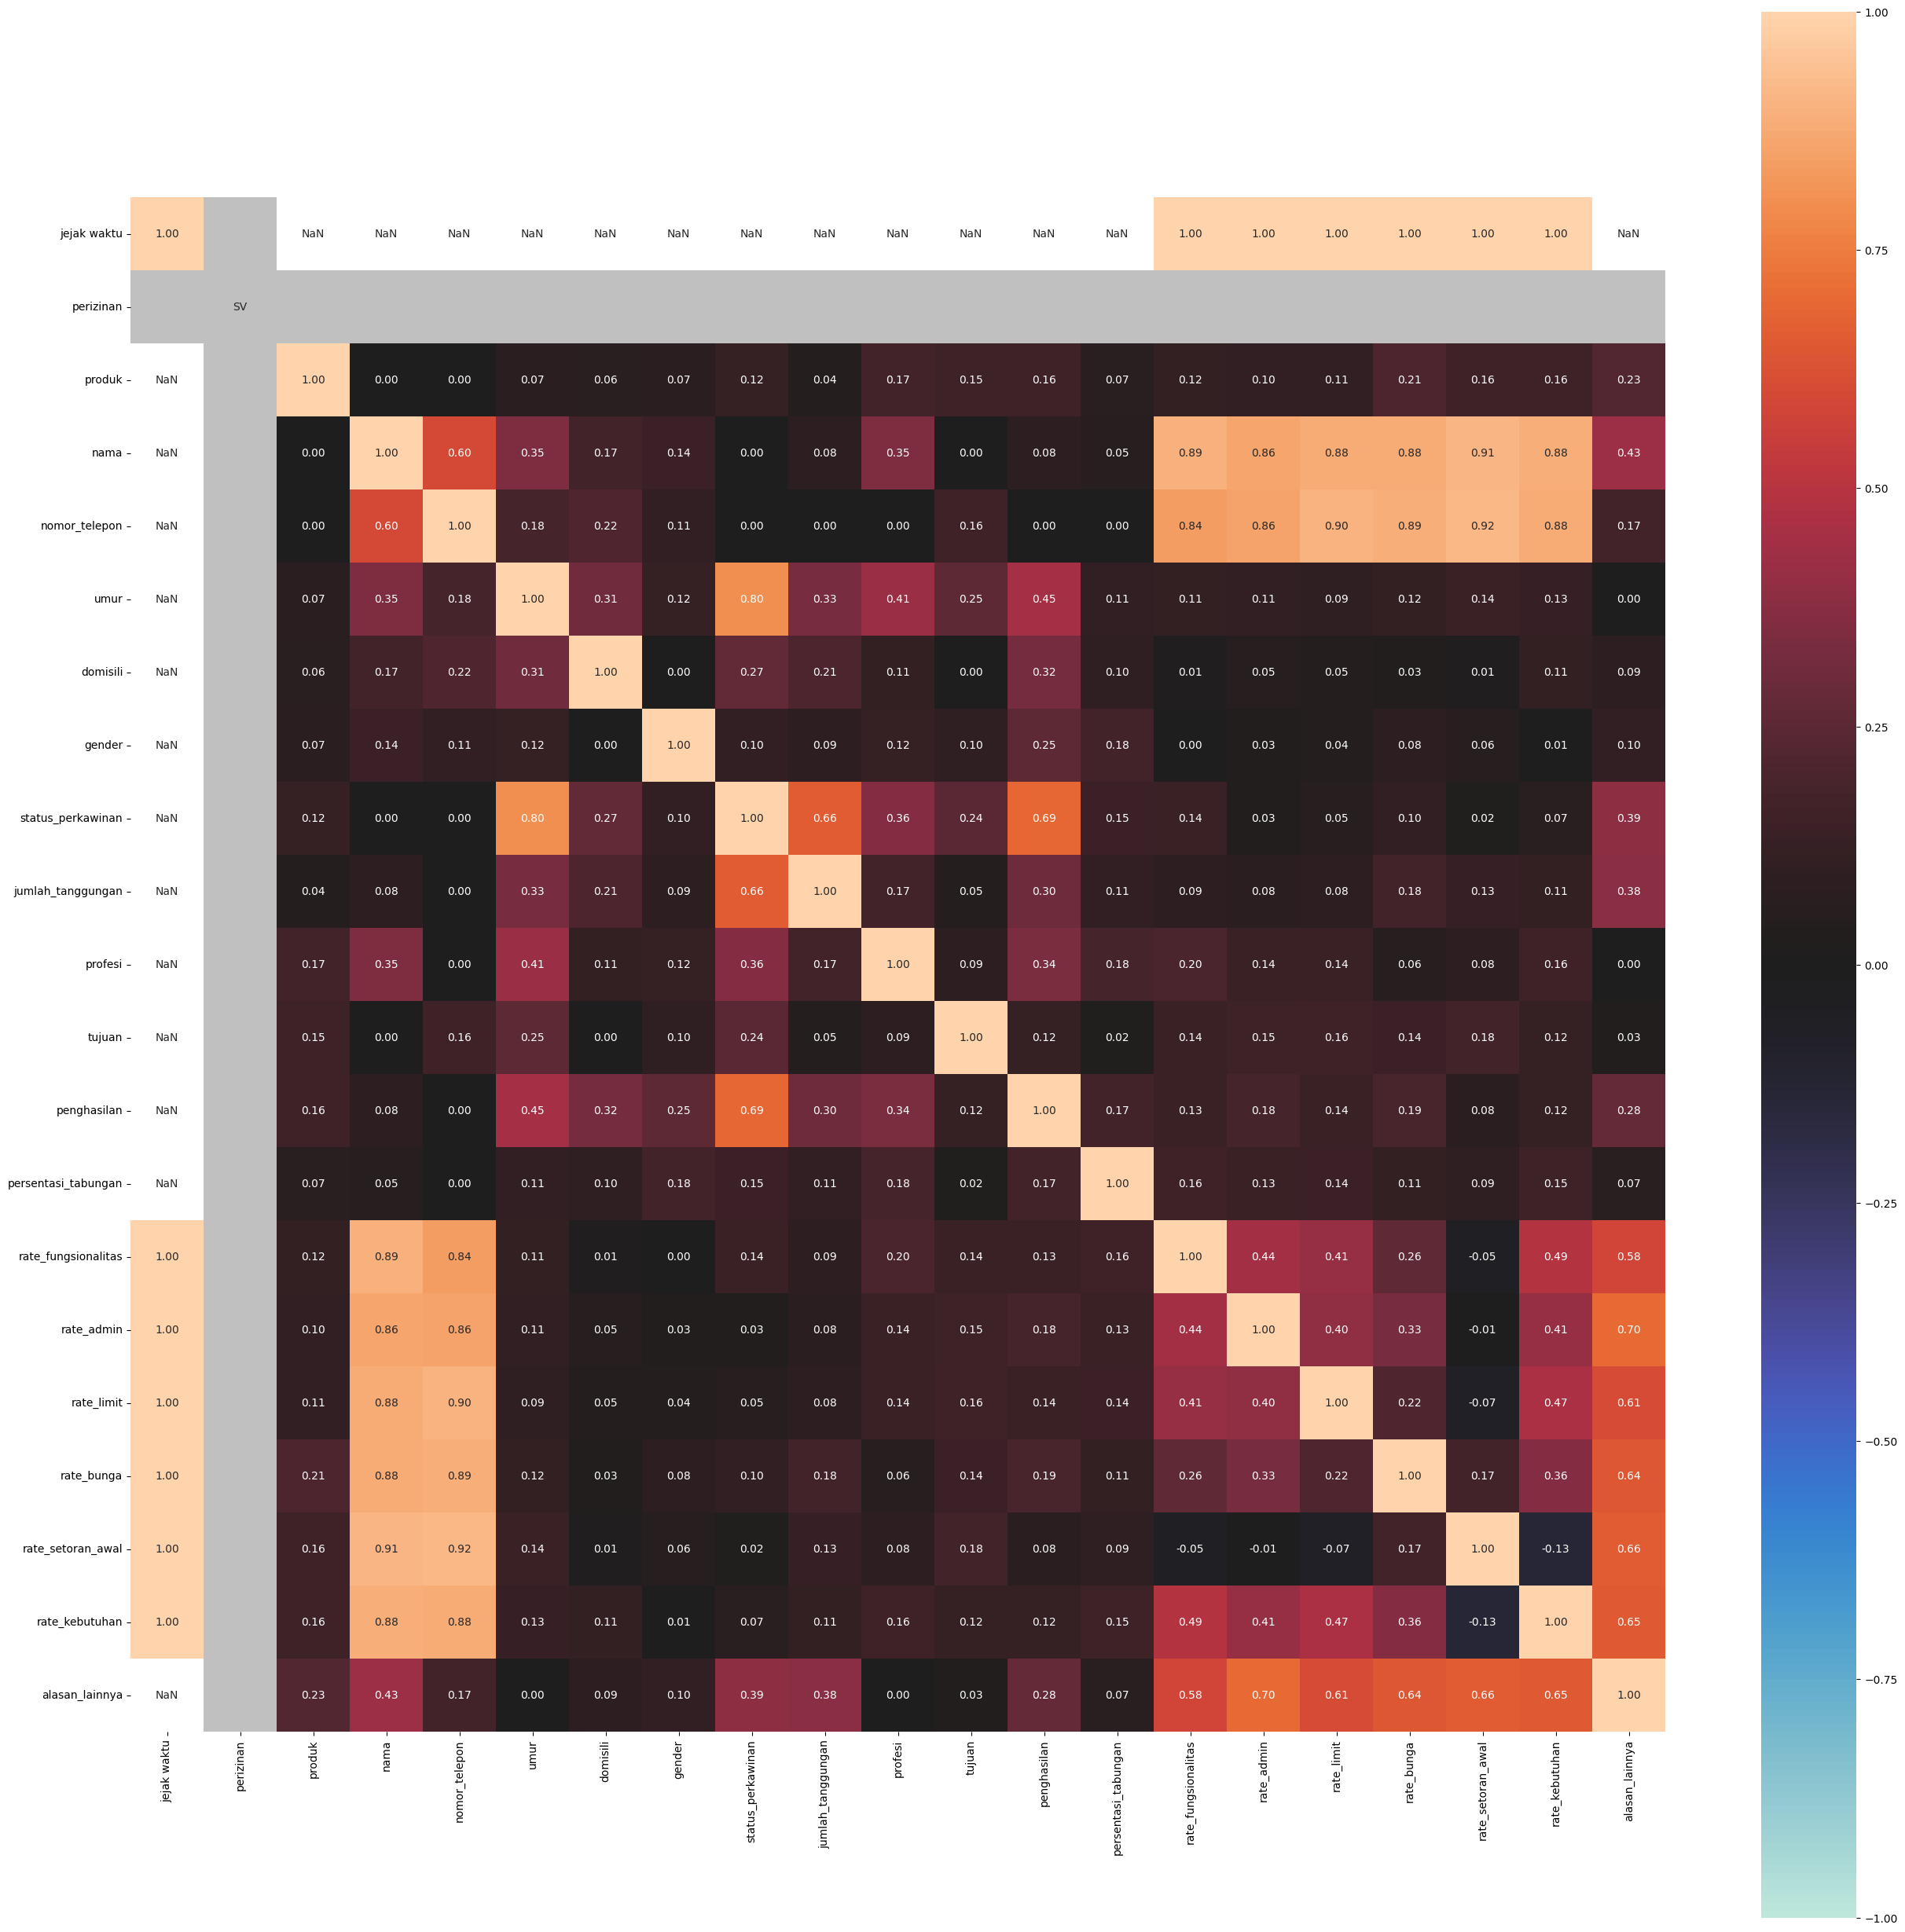

In [1046]:
correlations = associations(data)
corr = correlations['corr']

In [1047]:
# tampilin nilai corr mat by label
print(corr['produk'])

jejak waktu            0.000000
perizinan              0.000000
produk                 1.000000
nama                   0.000000
nomor_telepon          0.000000
umur                   0.072771
domisili               0.064560
gender                 0.074796
status_perkawinan      0.119990
jumlah_tanggungan      0.044001
profesi                0.174037
tujuan                 0.150302
penghasilan            0.158278
persentasi_tabungan    0.067802
rate_fungsionalitas    0.115046
rate_admin             0.104884
rate_limit             0.107012
rate_bunga             0.206831
rate_setoran_awal      0.162023
rate_kebutuhan         0.155213
alasan_lainnya         0.225196
Name: produk, dtype: float64


In [1048]:
irrelevant_attributes = corr['produk'][corr['produk'] < 0.05].keys()
print("Kolom yang akan dihapus:", irrelevant_attributes)

# Hapus kolom dengan korelasi < 0.05
for item in irrelevant_attributes:
    # Hapus kolom dengan nama yang ada di variabel `item`
    data.drop([item], axis=1, inplace=True)

# Drop kolom alasan lainnya
data.drop("alasan_lainnya", axis=1, inplace=True)

Kolom yang akan dihapus: Index(['jejak waktu', 'perizinan', 'nama', 'nomor_telepon',
       'jumlah_tanggungan'],
      dtype='object')


Remove Other Data Rate

In [1049]:
# Rate Fungsionalitas tidak Sesuai
data = data[data['rate_fungsionalitas'] > 2]

# Rate Admin tidak Sesuai
data = data[data['rate_admin'] > 2]

# Rate Limit tidak Sesuai
data = data[data['rate_limit'] > 2]

# Rate Bunga tidak Sesuai
data = data[data['rate_bunga'] > 2]

# Rate Setoran Awal tidak Sesuai
# data = data[data['rate_setoran_awal'] < 3]

# Rate Kebutuhan
data = data[data['rate_kebutuhan'] > 2]

# Drop kolom semua rate
data.drop("rate_fungsionalitas", axis=1, inplace=True)
data.drop("rate_admin", axis=1, inplace=True)
data.drop("rate_limit", axis=1, inplace=True)
data.drop("rate_bunga", axis=1, inplace=True)
data.drop("rate_setoran_awal", axis=1, inplace=True)
data.drop("rate_kebutuhan", axis=1, inplace=True)

Cek Data Final

In [1050]:
print(data.columns)
data.to_csv("../temp/data.csv")

Index(['produk', 'umur', 'domisili', 'gender', 'status_perkawinan', 'profesi',
       'tujuan', 'penghasilan', 'persentasi_tabungan'],
      dtype='object')


One Hot Encoding & Label Encoding

In [1051]:
from sklearn import preprocessing

#one-hot encoding purpose
all_purpose = {'Investasi', 'Simpanan jangka panjang', 'Kegiatan sehari-hari', 'Lainnya'}
for purpose in all_purpose:
    data[purpose] = data['tujuan'].apply(lambda x:1 if purpose in x else 0)
 
#rename column purpose    
data.rename(columns = {
    "Investasi":"investasi",
    "Simpanan jangka panjang":"simpanan_jangka_panjang",
    "Kegiatan sehari-hari":"kegiatan_sehari_hari",
    "Lainnya":"tujuan_lainnya"
    }, 
            inplace = True)
data = data.drop('tujuan',axis=1)

label_encoder = preprocessing.LabelEncoder() 

data['produk'] = label_encoder.fit_transform(data['produk'])
data['produk'].unique()
print(label_encoder.classes_)

data['domisili'] = label_encoder.fit_transform(data['domisili'])
data['domisili'].unique()

data['umur'] = label_encoder.fit_transform(data['umur'])
data['umur'].unique()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['gender'].unique()

data['status_perkawinan'] = label_encoder.fit_transform(data['status_perkawinan'])
data['status_perkawinan'].unique()

data['profesi'] = label_encoder.fit_transform(data['profesi'])
data['profesi'].unique()

data['penghasilan'] = label_encoder.fit_transform(data['penghasilan'])
data['penghasilan'].unique()

data['persentasi_tabungan'] = label_encoder.fit_transform(data['persentasi_tabungan'])
data['persentasi_tabungan'].unique()

['Tabungan Anak Muda' 'Tabungan Berjangka' 'Tabungan Medium'
 'Tabungan Online' 'Tabungan Pelajar' 'Tabungan Premium'
 'Tabungan Regular' 'TabunganKu']


array([3, 5, 2, 4, 1, 0])

Sampling Method

In [1052]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

In [1053]:
# print(data[data['produk'] == 2])
# data = data[data["produk"] != 2]
y = data['produk']
X = data.drop(['produk'],axis=1)
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


produk
6    148
0     38
3     24
1     10
4     10
7     10
5      7
2      3
Name: count, dtype: int64


In [1054]:
# Combine X and original y
combined_df = pd.concat([X_train, pd.Series(y_train, name='produk')], axis=1)

# Get class distribution
print(combined_df['produk'].value_counts())

# List to hold resampled data per class
resampled_dfs = []

for class_label in combined_df['produk'].unique():
    class_data = combined_df[combined_df['produk'] == class_label]

    if len(class_data) < 10:
        class_data = resample(class_data, replace=True, n_samples=10, random_state=42)
    elif len(class_data) < 30:
        class_data = resample(class_data, replace=True, n_samples=20, random_state=42)
    # elif len(class_data) < 40:
    #     class_data = resample(class_data, replace=True, n_samples=40, random_state=42)
    elif len(class_data) > 100:
        class_data = resample(class_data, replace=False, n_samples=100, random_state=42)
    # else:
    #     class_data = resample(class_data, replace=True, n_samples=20, random_state=42)

    resampled_dfs.append(class_data)

# Combine balanced data
final_resampled_df = pd.concat(resampled_dfs).reset_index(drop=True)

# Get class distribution
print(final_resampled_df['produk'].value_counts())

# Split back to X and y
X_train = final_resampled_df.drop('produk', axis=1)
y_train = final_resampled_df['produk']


produk
6    115
0     34
3     20
1      8
4      8
7      7
5      6
2      2
Name: count, dtype: int64
produk
6    100
0     34
3     20
1     10
7     10
4     10
2     10
5     10
Name: count, dtype: int64


In [1055]:
# Mengonversi label menjadi format numerik
y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes


Model

In [1056]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model XGBoost untuk klasifikasi multikelas
model = xgb.XGBClassifier(
    n_estimators=190,        # Jumlah pohon
    max_depth=4,              # Kedalaman maksimum pohon
    learning_rate=0.01,       # Learning rate
    objective='multi:softmax',# Untuk klasifikasi multikelas
    num_class=len(y.unique()),# Jumlah kelas
    random_state=42
)

# Train Model
model.fit(X_train, y_train)

# Prediksi dengan data test
y_pred = model.predict(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# Get the class with max probability
most_compatible_classes = np.argmax(probabilities, axis=1)

# Evaluate the model
accuracy_train = accuracy_score(y_train, model.predict(X_train)) * 100
print(f"Model Accuracy Train: " + str(accuracy_train))

precision_train = precision_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model Precision Train: " + str(precision_train))

recall_train = recall_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model Recall Train: " + str(recall_train))

f1_train = f1_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model F1 Train: " + str(f1_train))


accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy Test: " + str(accuracy))

precision = precision_score(y_test, y_pred, average='weighted') * 100
print(f"Model Precision Test: " + str(precision))

recall = recall_score(y_test, y_pred, average='weighted') * 100
print(f"Model Recall Test: " + str(recall))

f1 = f1_score(y_test, y_pred, average='weighted') * 100
print(f"Model F1 Score Test: " + str(f1))


# Show the first 5 samples with their most compatible class
for i in range(50):
    print(f"Sample {i+1}: Most Compatible Class = {most_compatible_classes[i]}, Probability = {max(probabilities[i])*100:.2f}%")


Model Accuracy Train: 71.07843137254902
Model Precision Train: 76.96243814664868
Model Recall Train: 71.07843137254902
Model F1 Train: 66.84046785736399
Model Accuracy Test: 64.0
Model Precision Test: 43.10204081632653
Model Recall Test: 64.0
Model F1 Score Test: 51.51219512195122
Sample 1: Most Compatible Class = 6, Probability = 47.15%
Sample 2: Most Compatible Class = 6, Probability = 69.02%
Sample 3: Most Compatible Class = 6, Probability = 47.74%
Sample 4: Most Compatible Class = 6, Probability = 40.91%
Sample 5: Most Compatible Class = 6, Probability = 44.38%
Sample 6: Most Compatible Class = 6, Probability = 42.33%
Sample 7: Most Compatible Class = 6, Probability = 40.62%
Sample 8: Most Compatible Class = 6, Probability = 47.74%
Sample 9: Most Compatible Class = 6, Probability = 71.56%
Sample 10: Most Compatible Class = 6, Probability = 31.59%
Sample 11: Most Compatible Class = 6, Probability = 69.18%
Sample 12: Most Compatible Class = 6, Probability = 32.40%
Sample 13: Most Com

c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\avenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Export Model

In [1057]:
model.save_model('../export_model/model_xgboost.json')

print("Model saved as model_xgboost.json!")

Model saved as model_xgboost.json!
